# Notebook Versão Monica

# Data Analysis using Machine Learning

This project consists in the analysis of dataset, through the use of machine learning algorithms, using Python as a programming language. This Jupyter Notebook is organized into sections, which include the steps of the analysis performed and explain very succinctly the procedures performed and decisions taken during the analysis.

## Table of contents

1. [Introduction](#chapter1)
    1. [About Us](#section1_1)
    2. [Data Selection and Context of this Project](#section1_2)
    3. [Credits](#section1_3)
2. [Initial Data Exploration and Preprocessing](#chapter2)
    1. [Importing Packages](#section2_1)
    2. [Importing datasets](#section2_2)
    3. [Exploring the data](#section2_3)
3. [Non-Supervised Analysis](#chapter3)
4. [Machine Learning](#chapter4)
5. [Deep Learning ](#chapter5)
6. [Conclusions](#chapter6)

<a class="anchor" id="chapter1"></a>

## 1. Introduction

<a class="anchor" id="section1_1"></a>

### 1.1 About Us

This project is part of the subject `Sistemas Inteligentes para a Bioinformática` in the Master in Bioinformatics (University of Minho - 2022/2023).

This project was developed by the following elements:
- Alexandre Miguel Magalhães Esperança - pg45963
- André Filipe Pereira da Silva - pg45462
- Mónica Rafaela Machado Leiras - pg45473

<a class="anchor" id="section1_2"></a>

### 1.2 Data Selection and Context of this Project

For the execution of this project, the dataset of the "Novozymes Enzyme Stability Prediction" Competition on the Kaggle platform was selected. You can view the [Competition and Corresponding Data here](https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/data).

The main goal of this competition is to predict the thermostability of enzyme variants. The experimentally measured thermostability (melting temperature) data includes natural sequences, as well as engineered sequences with single or multiple mutations upon the natural sequences.

The test dataset contains experimental melting temperatures of over 2,413 single mutation variants of an enzyme (GenBank: KOC15878.1), obtained by Novozymes A/S. The wild-type amino acid sequence is:

    VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK

For this competition several files were given for the development of this work:

- `train.csv` - the training data, with columns as follows:
  - `seq_id`: unique identifier of each protein variants
  - `protein_sequence`: amino acid sequence of each protein variant. The stability (as measured by tm) of protein is determined by its protein sequence.
  - `pH`: the scale used to specify the acidity of an aqueous solution under which the stability of protein was measured. Stability of the same protein can change at different pH levels.
  - `data_source`: source where the data was published
  - `tm`: target column. Since only the spearman correlation will be used for the evaluation, the correct prediction of the relative order is more important than the absolute tm values. (Higher tm means the protein variant is more stable.)
- `train_updates_20220929.csv` - correction file for train dataset, where some rows have the values ​​of `pH` and `tm` switched, in addition to identifying lines with NaN values. For more details, you can check the [original explanation here](https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356251)

- `test.csv` - the test data; your task is to predict the target tm for each protein_sequence (indicated by a unique seq_id)

- `sample_submission.csv` - a sample submission file in the correct format, with seq_id values corresponding to test.csv

- `wildtype_structure_prediction_af2.pdb` - the 3 dimensional structure of the enzyme listed above, as predicted by AlphaFold


<a class="anchor" id="section1_3"></a>

### 1.3 Credits

**NOTA: adicionar aqui ou no fim os repositorios a que devemos creditos?**

<a class="anchor" id="chapter2"></a>

## 2. Initial Data Exploration and Preprocessing

This step corresponds to the following objectives:
- description and characterization of the assigned data according to the existing documentation/literature;
- brief description of the characteristics of the data available from the initial exploratory analysis;
- description of data preparation and pre-processing steps;
- initial exploratory graphs that illustrate the main characteristics of the data.

<a class="anchor" id="section2_1"></a>

### 2.1 Importing Required Packages

**NOTA: não sei se faz sentido, mas poderiamos explicar pelo menos alguns dos packages, porque é que estamos a usa-los.**

In [5]:
# pip install sgt
# pip install propy
# pip install nbconvert

In [6]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import propy
from propy import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing 
from sgt import SGT
from file_func import *
from models import SupervisedModelOptimization
from sklearn.manifold import TSNE
# from keras.models import Sequential
# from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
# from keras import metrics
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from sklearn.linear_model import LogisticRegression
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<a class="anchor" id="section2_2"></a>

### 2.2 Importing datasets

In [7]:
#Train dataframe
train = pd.read_csv("data/train.csv",index_col="seq_id")
#Validation dataframe (test dataset for the competition scoring)
validation = pd.read_csv("data/test.csv",index_col="seq_id")

In [8]:
train.head()

,protein_sequence,pH,data_source,tm
seq_id,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [9]:
validation.head()

,protein_sequence,pH,data_source
seq_id,,,
31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


<a class="anchor" id="section2_3"></a>

### 2.3 Exploring the data

In [10]:
print(f"Train data is divided in {train.shape[0]} samples and {train.shape[1]} features")
print(f"Validation data is divided in {validation.shape[0]} samples and {validation.shape[1]} features")
print(f"Labels for train: {[labels for labels in train.columns]}")

Train data is divided in 31390 samples and 4 features
Validation data is divided in 2413 samples and 3 features
Labels for train: ['protein_sequence', 'pH', 'data_source', 'tm']


In [11]:
train.describe()

,pH,tm
count,31104.000000,31390.000000
mean,6.892339,49.147337
std,1.612225,14.010089
min,1.990000,-1.000000
25%,7.000000,42.100000
50%,7.000000,48.000000
75%,7.000000,53.800000
max,64.900000,130.000000


In [12]:
validation.describe()

,pH
count,2413.0
mean,8.0
std,0.0
min,8.0
25%,8.0
50%,8.0
75%,8.0
max,8.0


With this information, we can make some observations:

- the `data_source` variable is nominal, so we can't more information about this feature.
- the `validation` dataset corresponds to ~7% of total samples, while `train` dataset corresponds to ~93%.
- the `validation` dataset corresponds to the test dataset for the competition scoring, so it misses the `tm` feature (the variable to be predicted).
- the `pH` variable on the `train` dataset has a maximum value of 64.9.
- the `pH` variable on the `train` dataset has 31104 samples, while `tm` has 31390 (which is the total number of samples of that dataset).
- the `pH` variable on the `validation` dataset has all the samples with the same value of 8. 

#### Data sources

Para verificar a distribuição das sources na bases de dados, converte-se para uma variável nominal e observa-se a distribuição.

In [13]:
len(pd.unique(train["data_source"]))

325

In [14]:
print(train.data_source)

seq_id
0        doi.org/10.1038/s41592-020-0801-4
1        doi.org/10.1038/s41592-020-0801-4
2        doi.org/10.1038/s41592-020-0801-4
3        doi.org/10.1038/s41592-020-0801-4
4        doi.org/10.1038/s41592-020-0801-4
                       ...                
31385    doi.org/10.1038/s41592-020-0801-4
31386    doi.org/10.1038/s41592-020-0801-4
31387    doi.org/10.1038/s41592-020-0801-4
31388    doi.org/10.1038/s41592-020-0801-4
31389    doi.org/10.1038/s41592-020-0801-4
Name: data_source, Length: 31390, dtype: object


In [15]:
sources = {}
count = 1
for n, i in enumerate(train.data_source):
    if i not in sources.keys():
        sources[i] = count
        train.data_source[n] = sources[i]
        count += 1
    else:
        train.data_source[n] = sources[i]

# print(train.data_source)

/tmp/ipykernel_82356/722519737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.data_source[n] = sources[i]
/tmp/ipykernel_82356/722519737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.data_source[n] = sources[i]


In [16]:
print(pd.Series(train.data_source).describe())

count     31390
unique      325
top           1
freq      24525
Name: data_source, dtype: int64


In [17]:
unique, counts = np.unique(train.data_source, return_counts=True)
dicion = dict(zip(unique, counts))

for i,a in dicion.items():
    if a > 300: # 1% do total counts
        print('Data Source: ', i, 'Counts: ', a)
        print('Percentage of total counts: ', round((a*100)/train.data_source.describe()[0], 2), '%')


Data Source:  1 Counts:  24525
Percentage of total counts:  78.13 %
Data Source:  2 Counts:  3347
Percentage of total counts:  10.66 %


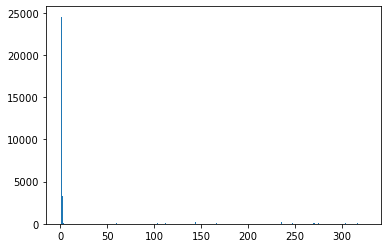

In [18]:
plt.hist(train.data_source, bins=325)
plt.show()

We can observe that 78% of the dataset corresponds to one unique data source.

Although this feature (`data source`) is interesting to explore how the data was obtained, it contains a large number of null values (NA) and is not essential to the main goal of this project (**to predict `tm`**).
So, it was decided to drop this column from the dataset (presented further ahead).

In [24]:
prot_uniq = pd.unique(train["protein_sequence"])

#### Swap pH e tm (to correct data)

Here it is possible to verify that the `pH` variable has errors in the "train" dataset since its maximum is 64.9 (a value impossible to obtain). According to the source of the data, the variable pH and tm have some examples with the values changed. Thus, it is necessary to change these values in the identified sequences (dataset "train_updates").

Here it is possible to verify that the `pH` variable has errors in the `train` dataset, since its maximum is 64.9 (impossible pH value to obtain). According to the [source of the competition](https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356251), the variable `pH` and `tm` has some samples with the values swapped. Thus, it is necessary to change these values in the identified sequences (dataset `train_updates`).

In [35]:
update_train = pd.read_csv("data/train_updates_20220929.csv",index_col="seq_id")
train = swap_ph_tm(train,update_train)

In [36]:
print(f"Labels: {[labels for labels in train.columns]}")
print(f"Labels: {[labels for labels in validation.columns]}")

Labels: ['protein_sequence', 'pH', 'data_source', 'tm']
Labels: ['protein_sequence', 'pH', 'data_source']


#### Drop NA Values

As said above, the column `data_source` will be eliminated from the dataset, as well as the rest of the samples with null values.

In [37]:
print("Remove data_source")
train = train.drop(columns="data_source")
validation = validation.drop(columns="data_source")
print(f"Train data is divided in {train.shape[0]} lines and {train.shape[1]} col")
print(f"Validation data is divided in {validation.shape[0]} lines and {validation.shape[1]} col")
print("We want to predict tm values for test data")

Remove data_source
Train data is divided in 28981 lines and 3 col
Validation data is divided in 2413 lines and 2 col
We want to predict tm values for test data


In [38]:
print(train.isnull().sum().sort_values(ascending=False))
print(validation.isnull().sum().sort_values(ascending=False))

pH                  286
protein_sequence      0
tm                    0
dtype: int64
protein_sequence    0
pH                  0
dtype: int64


In [39]:
missing_data = train[train["pH"].isnull()]
# missing_data

In [40]:
train= train.drop((missing_data).index)
train

,protein_sequence,pH,tm
seq_id,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6


In [41]:
print(train.isnull().sum().sort_values(ascending=False))
print(validation.isnull().sum().sort_values(ascending=False))

protein_sequence    0
pH                  0
tm                  0
dtype: int64
protein_sequence    0
pH                  0
dtype: int64


#### Exploring Protein Sequence feature

In [22]:
# Tamanho das sequencias de proteina e distribuição
lista = [len(train['protein_sequence'].iat[i]) for i in range(len(train))]
pd.Series(lista).describe()

count    28695.000000
mean       451.729535
std        416.889872
min          5.000000
25%        210.000000
50%        352.000000
75%        537.000000
max       8798.000000
dtype: float64

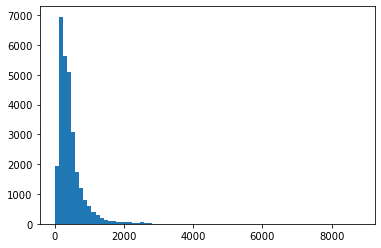

In [23]:
plt.hist(lista, bins=75)
plt.show()

#adicionar titulos aos eixos e grafico

In [42]:
print(pd.Series(train.protein_sequence).describe())

count                                                 28695
unique                                                27141
top       MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...
freq                                                     13
Name: protein_sequence, dtype: object


In [88]:
prot_dup = train[train.duplicated(subset=['protein_sequence'],keep=False)]

In [89]:
prot_dup.describe()

,pH,tm
count,2393.000000,2393.000000
mean,5.683092,53.444296
std,1.902300,12.508352
min,1.990000,25.200000
25%,4.200000,45.000000
50%,6.500000,52.100000
75%,7.000000,61.000000
max,11.000000,130.000000


In [90]:
prot_dup.protein_sequence.describe()

count                                                  2393
unique                                                  839
top       MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...
freq                                                     13
Name: protein_sequence, dtype: object

In [91]:
prot_dup = prot_dup[prot_dup.duplicated(subset=['protein_sequence'],keep=False)]

In [92]:
prot_dup.protein_sequence.describe()

count                                                  2393
unique                                                  839
top       MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...
freq                                                     13
Name: protein_sequence, dtype: object

In [75]:
dup = {}
count = 1
for n, i in enumerate(prot_dup.protein_sequence):
    if i not in dup.keys():
        dup[i] = count
        prot_dup.protein_sequence[n] = dup[i]
        count += 1
    else:
        prot_dup.protein_sequence[n] = dup[i]


/tmp/ipykernel_82356/4259373334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prot_dup.protein_sequence[n] = dup[i]
/tmp/ipykernel_82356/4259373334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prot_dup.protein_sequence[n] = dup[i]
/tmp/ipykernel_82356/4259373334.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prot_dup.protein_sequence[n] = dup[i]
/tmp/ipykernel_82356/4259373334.py:9: SettingWithCopyWarning: 
A value is

In [80]:
prot_dup.protein_sequence

seq_id
972      DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...
973      DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...
974      DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...
982      DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...
983      DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...
                               ...                        
30797    TLSKSDAKKAASKMLLEKTQFSDKPVQDRGLVVTDIKAEDVVLEHR...
31079    VQLGQQVLECRAVLGGTRNPRRMRPEQEELVMLGADHVEYRYGKAM...
31080    VQLGQQVLECRAVLGGTRNPRRMRPEQEELVMLGADHVEYRYGKAM...
31271    YFIMACDQYSCSLTAPALDIATGHASLADIWAKTPPVTAKAAQLYA...
31272    YFIMACDQYSCSLTAPALDIATGHASLADIWAKTPPVTAKAAQLYA...
Name: protein_sequence, Length: 2393, dtype: object

In [65]:
unique, counts = np.unique(prot_dup.protein_sequence, return_counts=True)
dicion = dict(zip(unique, counts))


for i,a in dicion.items():
    if a > 300: # 1% do total counts
        print('Data Source: ', i, 'Counts: ', a)
        print('Percentage of total counts: ', round((a*100)/prot_dup.protein_sequence.describe()[0], 2), '%')


TypeError: '<' not supported between instances of 'str' and 'int'

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not seq_id
972      DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...
973      DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...
974      DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...
982      DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...
983      DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...
                               ...                        
30797    TLSKSDAKKAASKMLLEKTQFSDKPVQDRGLVVTDIKAEDVVLEHR...
31079    VQLGQQVLECRAVLGGTRNPRRMRPEQEELVMLGADHVEYRYGKAM...
31080    VQLGQQVLECRAVLGGTRNPRRMRPEQEELVMLGADHVEYRYGKAM...
31271    YFIMACDQYSCSLTAPALDIATGHASLADIWAKTPPVTAKAAQLYA...
31272    YFIMACDQYSCSLTAPALDIATGHASLADIWAKTPPVTAKAAQLYA...
Name: protein_sequence, Length: 2393, dtype: object

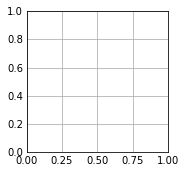

In [60]:
plt.style.use('_mpl-gallery')

# make the data

x = prot_dup['pH']
y = prot_dup['tm']

# sizes = np.random.uniform(15, 80, len(x))
colors = prot_dup['protein_sequence']

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [59]:
print(prot_dup.groupby("protein_sequence").describe())

                                                      pH                      \
                                                   count      mean       std   
protein_sequence                                                               
DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPTQ...   3.0  7.000000  0.000000   
DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPTQ...   2.0  7.000000  0.000000   
DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPTQ...   3.0  7.000000  0.000000   
DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPTQ...   7.0  6.357143  0.675419   
DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQARESVLPTQ...   3.0  7.000000  0.000000   
...                                                  ...       ...       ...   
SNMAVVTCGSVVKLLNTRHNVRLHSHDVRYGSGSGQQSVTGVTSVDD...   2.0  7.000000  0.000000   
THDLPKAVVKLEPPWIQVLKEDTVTLTCEGTHNPGNSSTQWFHNGRS...   2.0  7.000000  0.000000   
TLSKSDAKKAASKMLLEKTQFSDKPVQDRGLVVTDIKAEDVVLEHRS...   2.0  7.000000  0.000000   
VQLGQQVLECRAVLGGTRNPRRMRPEQEELVMLGADHVEY

In [46]:
import seaborn as sns

KeyError: 'protein_sequence'

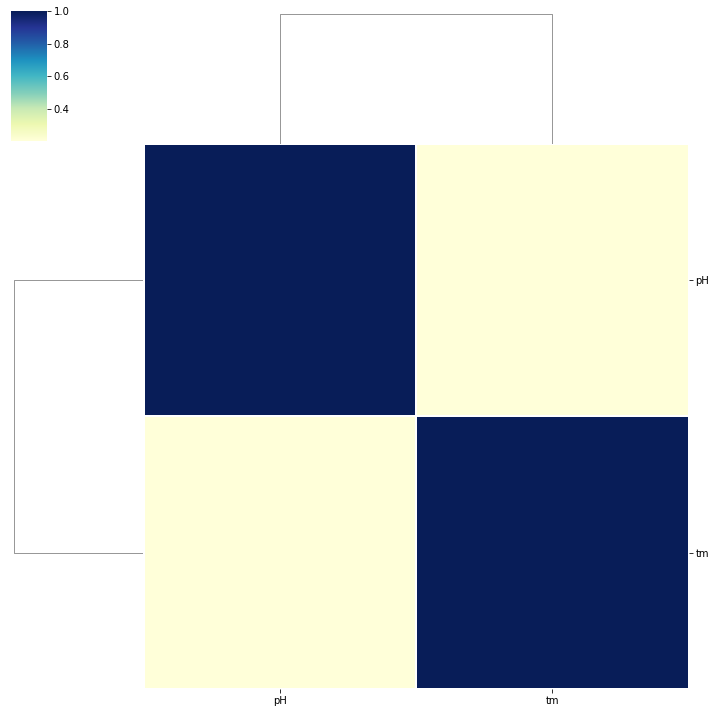

In [52]:
corrmat = prot_dup.corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
  
k = 2 
  
cols = corrmat.nlargest(k, 'protein_sequence')['protein_sequence'].index
  
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10))
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values, 
                              xticklabels = cols.values)

#### Summary

In [24]:
train.describe()

,pH,tm
count,28695.000000,28695.000000
mean,6.872467,51.385604
std,0.793184,12.076609
min,1.990000,25.100000
25%,7.000000,43.700000
50%,7.000000,48.800000
75%,7.000000,54.600000
max,11.000000,130.000000


In [25]:
print(f"Train data is divided in {train.shape[0]} samples and {train.shape[1]} features")
print(f"Labels for train: {[labels for labels in train.columns]}")

Train data is divided in 28695 samples and 3 features
Labels for train: ['protein_sequence', 'pH', 'tm']


Now, other observations can be made:

- the `train` dataset without null values has a total of 28695 samples and only 3 features: `protein_sequence`, `pH` and `tm`.
- the `pH` feature has values between 1.9 and 11 but, the majority of samples have a pH value of 7.
- the `tm` feature has values between 25 and 130, but 50% of samples have a smaller range: 44-55.
- the `protein_sequence` samples have a large range of lenghts (between 5 and 8798), but 50% of samples have lenghts between 210 and 537). The mean lenght of the 28695 sequences is 451.
- to use some machine learning techniques it is needed to transform the feature `protein_sequence` into descriptors (multiple features), such as the frequency of the aminoacids, composition, physicochemical properties of the protein, and many others.

<a class="anchor" id="chapter3"></a>

## 3. Non-Supervised Analysis

<a class="anchor" id="chapter4"></a>

## 4. Machine Learning

<a class="anchor" id="chapter5"></a>

## 5. Deep Learning

<a class="anchor" id="chapter6"></a>

## 6. Conclusions